<a href="https://colab.research.google.com/github/aiaaee/Car-Price-Prediction/blob/main/Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [161]:
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor

## Extraction

In [3]:
with ZipFile("/content/archive (2).zip", 'r') as Unzip:
    Unzip.extractall(path="./")

In [4]:
data = pd.read_csv('/content/car_price_dataset.csv')

In [5]:
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [6]:
data = data.dropna()

(10000, 10)

## Explority Data Analysis

In [ ]:
data.describe().T.style.background_gradient(cmap = sns.color_palette("flare", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
Year,10000.000000,2011.543700,6.897699,2000.000000,2006.000000,2012.000000,2017.000000,2023.000000
Engine_Size,10000.000000,3.000560,1.149324,1.000000,2.000000,3.000000,4.000000,5.000000
Mileage,10000.000000,149239.111800,86322.348957,25.000000,74649.250000,149587.000000,223577.500000,299947.000000
Doors,10000.000000,3.497100,1.110097,2.000000,3.000000,3.000000,4.000000,5.000000
Owner_Count,10000.000000,2.991100,1.422682,1.000000,2.000000,3.000000,4.000000,5.000000
Price,10000.000000,8852.964400,3112.596810,2000.000000,6646.000000,8858.500000,11086.500000,18301.000000


In [ ]:
data.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [ ]:
data.dtypes

,0
Brand,object
Model,object
Year,int64
Engine_Size,float64
Fuel_Type,object
Transmission,object
Mileage,int64
Doors,int64
Owner_Count,int64
Price,int64


<ipython-input-17-071f19ab0b42>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


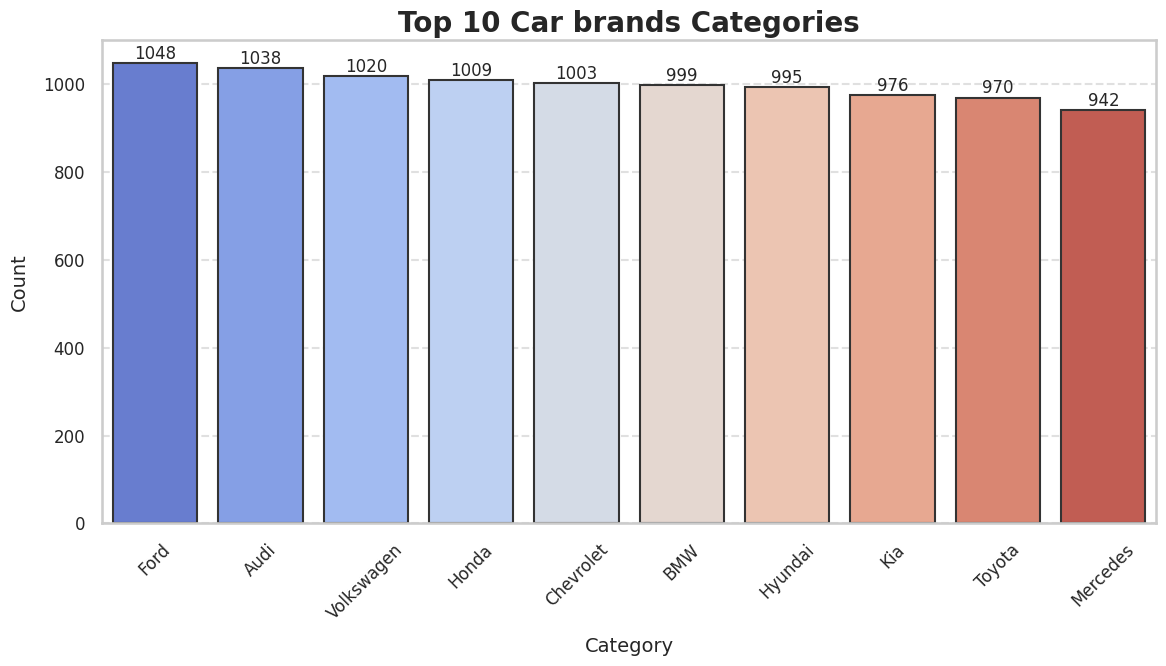

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

counts = pd.Series(data.Brand).value_counts()

# Show top 10 categories
top_counts = counts.head(10)

# Set the style and context
sns.set_theme(style="whitegrid", context="talk")

# Create the plot
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    x=top_counts.index,
    y=top_counts.values,
    palette="coolwarm",
    edgecolor=".2"
)

# Add value annotations
for i, value in enumerate(top_counts.values):
    ax.text(i, value + 0.2, f'{value}', ha='center', va='bottom', fontsize=12)

# Customize the plot
ax.set_title('Top 10 Car brands Categories', fontsize=20, weight='bold')
ax.set_xlabel('Category', fontsize=14, labelpad=10)
ax.set_ylabel('Count', fontsize=14, labelpad=10)
ax.tick_params(axis='x', labelrotation=45, labelsize=12)
ax.tick_params(axis='y', labelsize=12)

# Add gridlines and tight layout
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Brand
# Fuel_Type
px.histogram(data_frame=data, x='Price', color='Fe',color_discrete_sequence=['#ff3399','#3399ff'])

In [ ]:
px.scatter(data_frame=data,x='Price',color='Engine_Size',color_discrete_sequence=['#ff3399','#3399ff'])

In [ ]:
data.model.value_counts()

,count
model,
M3 Base,29
F-150 XLT,22
Corvette Base,22
Camaro 2SS,17
Mustang GT Premium,16
...,...
XTS Premium,1
Terrain Denali,1
Mazda3 i Sport,1


In [ ]:
fig = px.scatter_3d(data, x='Model', y='Price' , z='Year' , color='Year')
fig.show()

## Data Preprocessing

In [10]:
data.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [17]:
data = data.drop('Owner_Count' , axis=1)

In [21]:
X = data.loc[: , data.columns != 'Price']
y = data['Price']

In [98]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

In [99]:
str_attr = []
for i in data.columns :
  if(data[i].dtypes == 'O'):
    str_attr.append(i)

In [108]:
num_attr = []
for i in data.columns :
  if(data[i].dtypes =='int' or data[i].dtypes =='float'):
    num_attr.append(i)

In [109]:
num_attr.remove("Price")
print(str_attr , num_attr)
print(len(str_attr)  , len(num_attr))

['Brand', 'Model', 'Fuel_Type', 'Transmission'] ['Year', 'Engine_Size', 'Mileage', 'Doors']
4 4


In [119]:
cat_pr = make_pipeline(
    SimpleImputer(strategy='most_frequent') ,
    OneHotEncoder()
)

num_pr = make_pipeline(
    SimpleImputer(strategy='median') ,
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ('Categorical preprocessing' , cat_pr , str_attr) ,
    ("Numerical preprocessing" , num_pr , num_attr)
])

In [120]:
preprocessing

ColumnTransformer(transformers=[('Categorical preprocessing',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Brand', 'Model', 'Fuel_Type',
                                  'Transmission']),
                                ('Numerical preprocessing',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Year', 'Engine_Size', 'Mileage', 'Doors'])])

## Model Evaluation

In [135]:
def ModelEvaluation(Regression_model , preprocessing , X_train , X_test , y_train , y_test):
  model = make_pipeline(preprocessing , Regression_model)
  model.fit(X_train , y_train.astype('float'))
  y_pred = model.predict(X_test)
  return mean_squared_error(y_test , y_pred)

In [138]:
Linreg = LinearRegression()
ModelEvaluation(Linreg , preprocessing , X_train , X_test , y_train , y_test)

8606.819625473967

In [143]:
Ridge = Ridge(random_state=42)
ModelEvaluation(Ridge , preprocessing , X_train , X_test , y_train , y_test)

8606.928289552656

In [155]:
lasso = Lasso(alpha=0.1)
ModelEvaluation(lasso , preprocessing , X_train , X_test , y_train , y_test)

8597.145123226599

In [157]:
ElasticNet = ElasticNet(alpha=0.1)
ModelEvaluation(ElasticNet , preprocessing , X_train , X_test , y_train , y_test)


55442.98237977298

In [160]:
DecisionTree = DecisionTreeRegressor()
ModelEvaluation(DecisionTree , preprocessing , X_train , X_test , y_train , y_test)

373961.737

In [162]:
GBR = GradientBoostingRegressor()
ModelEvaluation(GBR, preprocessing , X_train , X_test , y_train , y_test)

46052.510535589